[[ 59182.08955224   5878.35820896]
 [104386.95652174   7289.13043478]
 [ 22495.40229885   5307.18390805]]
[2 2 2 1 1 1 1 2 1 3 3 2 3 1 2 0 2 1 2 2 1 1 2 3 0 3 1 2 1 3 1 3 3 2 3 3 3
 1 3 0 0 1 2 1 1 3 3 3 3 0 1 2 0 0 2 2 1 2 3 2 0 2 3 1 3 1 3 2 3 1 2 2 2 2
 1 1 0 2 3 1 1 1 3 3 0 2 2 3 1 1 2 1 0 3 1 3 1 2 1 1 3 0 2 1 1 2 2 3 3 0 0
 2 2 2 2 3 1 2 3 3 1 3 2 2 2 3 1 1 0 1 1 3 3 3 3 1 3 3 2 3 2 1 3 3 2 3 3 3
 3 1 3 3 2 1 3 0 1 3 0 1 3 3 3 3 1 3 3 2 1 1 2 1 1 3 2 1 1 3 0 3 3 2 3 0 2
 0 1 1 3 1 3 1 3 2 1 2 2 3 3 3]


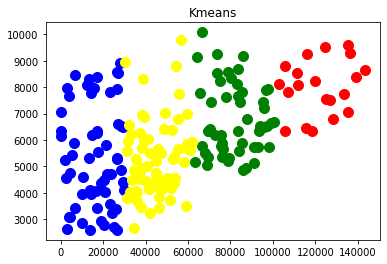

[242389902746.875, 69083288306.74911, 37362865661.973114, 19665039712.795002, 12911353632.710127, 8631933632.93952, 6759928141.384079, 5301517432.980299, 4172822197.44695, 3330255811.549154]


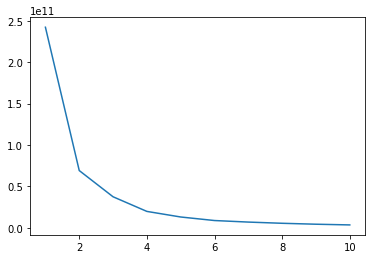

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

veriler = pd.read_csv('musteriler.csv')

X = veriler.iloc[:,3:].values

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init = 'k-means++')
kmeans.fit(X)

print(kmeans.cluster_centers_)#clusterların merkezleri bulunur

sonuclar = []
for i in range(1,11):
  kmeans = KMeans(n_clusters= i, init='k-means++', random_state = 123) #her seferinde aynı random ile alsın
  #farklı cluster sayısını dene
  kmeans.fit(X)
  sonuclar.append(kmeans.inertia_)

kmeans = KMeans(n_clusters= 4, init='k-means++', random_state = 123)
Y_tahmin = kmeans.fit_predict(X)
print(Y_tahmin)

plt.scatter(X[Y_tahmin==0,0],X[Y_tahmin==0,1],s=100, c='red') #ikinci için, y degeri 0 ise 1.ci kolan arasındaki deger
plt.scatter(X[Y_tahmin==1,0],X[Y_tahmin==1,1],s=100, c='blue')
plt.scatter(X[Y_tahmin==2,0],X[Y_tahmin==2,1],s=100, c='green')
plt.scatter(X[Y_tahmin==3,0],X[Y_tahmin==3,1],s=100, c='yellow')
plt.title('Kmeans')
plt.show()

print(sonuclar)

plt.plot(range(1,11),sonuclar) #segmentason noktaları gösterilir #wscc dusurmek icin ornek olarak 4 sec
plt.show()

[0 0 0 2 2 2 2 0 2 1 1 0 1 2 0 0 0 2 0 0 2 2 0 1 0 1 2 0 2 1 2 1 1 0 1 1 1
 2 1 0 0 2 0 2 2 1 1 1 1 0 2 0 0 0 0 0 2 0 1 0 0 0 1 2 1 2 1 0 1 2 0 0 0 0
 2 2 0 0 1 2 2 2 1 1 0 0 0 1 2 2 0 2 0 1 2 1 2 0 2 2 1 0 0 2 2 0 0 1 1 0 0
 0 0 0 0 1 2 0 1 1 2 1 0 0 0 1 2 2 0 2 2 1 1 1 1 2 1 1 0 1 0 2 1 1 0 1 1 1
 1 2 1 1 0 2 1 0 2 1 0 2 1 1 2 1 2 1 1 0 2 2 0 2 2 1 1 2 2 1 0 1 1 0 1 0 0
 0 2 2 1 2 1 2 1 0 2 0 0 1 1 1]


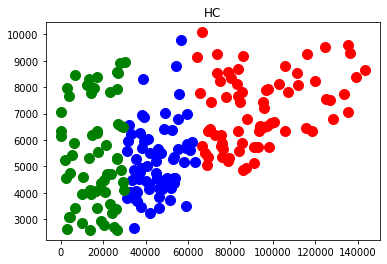

In [54]:
#HC
from  sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

Y_tahmin = ac.fit_predict(X)#hem inşa et hem tahmin et
print(Y_tahmin)

plt.scatter(X[Y_tahmin==0,0],X[Y_tahmin==0,1],s=100, c='red') #ikinci için, y degeri 0 ise 1.ci kolan arasındaki deger
plt.scatter(X[Y_tahmin==1,0],X[Y_tahmin==1,1],s=100, c='blue')
plt.scatter(X[Y_tahmin==2,0],X[Y_tahmin==2,1],s=100, c='green')
plt.title('HC')
plt.show()

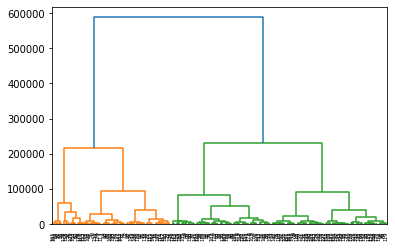

In [55]:
#dendrogram gosterme
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()